# Loan accepted vs rejected prediction modeling

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go
import math

import scipy.stats.distributions as dist
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from generic_functions import value_counts_to_dataframe, pivot_dim2
from modelling_functions import fit_model, kfold_cross_validation

# balancing dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn import model_selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import precision_recall_curve


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.pipeline import Pipeline

from scipy.stats import reciprocal, uniform

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

os.getcwd()

'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/V2'

In [6]:
# path_file_xtrain = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/V2/output/loan/x_train.csv'
# path_file_xtest = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/V2/output/loan/x_test.csv'
# path_file_ytrain = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/V2/output/loan/y_train.csv'
# path_file_ytest = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/V2/output/loan/y_test.csv'

path_file_xtrain = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/V2/output/loan/sample/x_train.csv'
path_file_xtest = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/V2/output/loan/sample/x_test.csv'
path_file_ytrain = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/V2/output/loan/sample/y_train.csv'
path_file_ytest = f'/Users/kristinazekiene/Documents/LearningPython/TuringCollege/M3S3/V2/output/loan/sample/y_test.csv'

x_train = pd.read_csv(path_file_xtrain)
x_test = pd.read_csv(path_file_xtest)
y_train = pd.read_csv(path_file_ytrain)
y_test = pd.read_csv(path_file_ytest)
x_train.head(3)

,year,loan_amnt,risk_score,dti,emp_length,ohe__loan_title_agg_business,ohe__loan_title_agg_car,ohe__loan_title_agg_credit_card,ohe__loan_title_agg_debt,ohe__loan_title_agg_home,ohe__loan_title_agg_medical,ohe__loan_title_agg_other,ohe__loan_title_agg_personal_loan,ohe__loan_title_agg_purchase
0,0.0,25000.0,672.0,24.59,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,5000.0,672.0,45.76,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,6000.0,672.0,1022.12,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Random forest

ROC_AUC Score :  94.69%


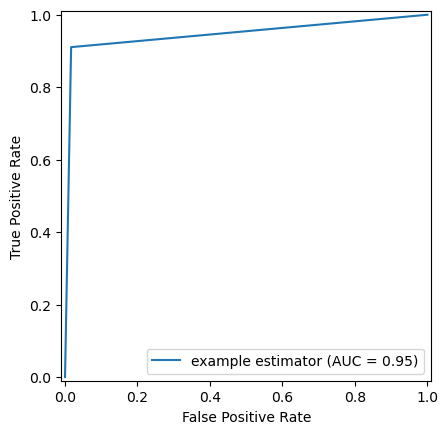

{'acc_in_fold_1': 0.9733201936482826}
{'acc_in_fold_2': 0.9732830356941679}
{'acc_in_fold_3': 0.9731316367960199}
{'acc_in_fold_4': 0.9734257380498637}
{'acc_in_fold_5': 0.9730588914275775}
Cross Validation Score :  97.32%
CPU times: user 1h 8min 55s, sys: 3min 59s, total: 1h 12min 55s
Wall time: 2h 28min 37s


{'model_name': 'Random Forest',
 'acc': 97.36444228137768,
 'precision': 93.88358323997664,
 'recall': 94.68849175919121,
 'f1': 94.28071654243426}

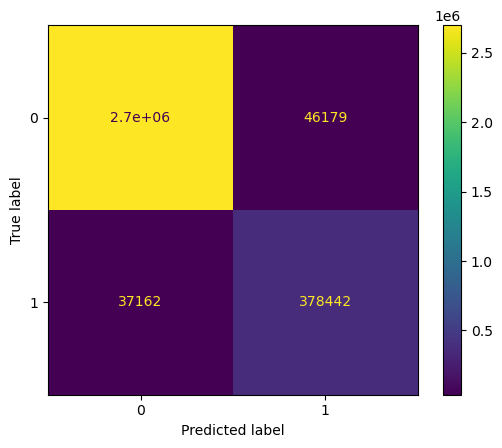

In [6]:
%%time
rf = RandomForestClassifier(random_state=42)

res = fit_model('Random Forest',rf,x_train,y_train,x_test,y_test)
# res_df = res_df.append(pd.DataFrame.from_dict(res,orient='index').T)
res_df = pd.DataFrame.from_dict(res,orient='index').T
kfold_cross_validation('Random Forest',rf,x_train,y_train)
res

In [9]:
%%time

#Setting the range for class weights
weights = np.linspace(0.0,0.99,10)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}


#Fitting grid search to the train data with 5 folds
rf = RandomForestClassifier(random_state=42)

gridsearch = GridSearchCV(estimator= rf, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(x_train, y_train)
clear_output()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


python(17532) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17533) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17534) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17535) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17536) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17537) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17539) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(17540) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/kristinazekiene/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

KeyboardInterrupt: 

In [3]:
print('Best weights:',gridsearch.best_params_)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(data=weigh_data, x="weight", y="score")
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=14)

In [3]:
rf = RandomForestClassifier(random_state=42,class_weight=gridsearch.best_params_.get("class_weight"))

res = fit_model('Random Forest',rf,x_train,y_train,x_test,y_test)
# res_df = res_df.append(pd.DataFrame.from_dict(res,orient='index').T)
res_df = pd.DataFrame.from_dict(res,orient='index').T
kfold_cross_validation('Random Forest',rf,x_train,y_train)
res

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/kristinazekiene/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/kristinazekiene/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/kristinazekiene/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/kristinazekiene/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed whe

KeyboardInterrupt: 

# Logistic regresion

ROC_AUC Score :  74.22%


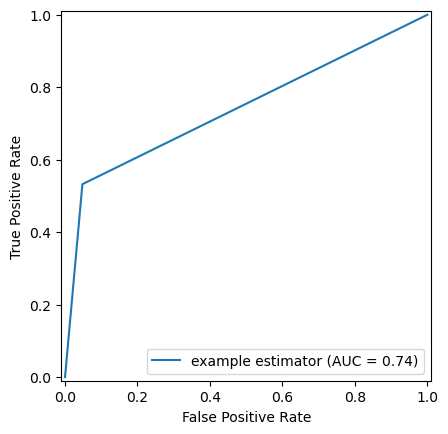

{'acc_in_fold_1': 0.8961166380273712}
{'acc_in_fold_2': 0.8969214635015996}
{'acc_in_fold_3': 0.9011353336171568}
{'acc_in_fold_4': 0.8963474916997431}
{'acc_in_fold_5': 0.9003909492675136}
Cross Validation Score :  89.82%
CPU times: user 23min 12s, sys: 8min 5s, total: 31min 18s
Wall time: 6min 20s


{'model_name': 'Logistic Regression',
 'acc': 89.69067828903948,
 'precision': 77.8886906102785,
 'recall': 74.22145639032432,
 'f1': 75.85610909641028}

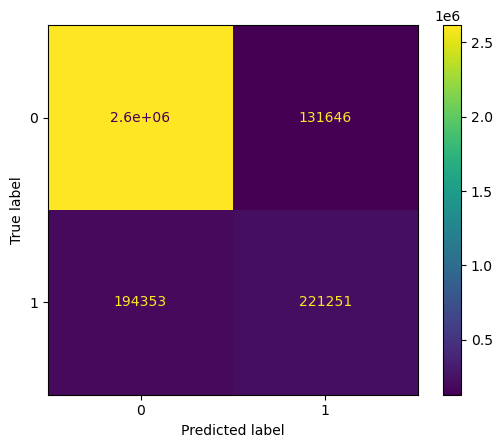

In [8]:
%%time
lr = LogisticRegression(random_state=42)

res = fit_model('Logistic Regression',lr,x_train,y_train,x_test,y_test)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('Logistic Regression',lr,x_train,y_train)
res

# GradientBoostingClassifier

ROC_AUC Score :  93.98%


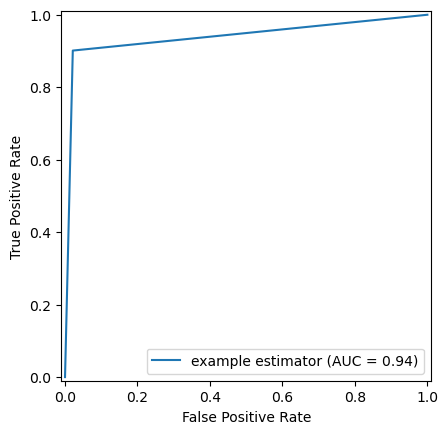

{'acc_in_fold_1': 0.968458826417408}
{'acc_in_fold_2': 0.9684710806363181}
{'acc_in_fold_3': 0.9688778416446585}
{'acc_in_fold_4': 0.9686252466161556}
{'acc_in_fold_5': 0.9681425759168927}
Cross Validation Score :  96.85%
CPU times: user 1h 23min 56s, sys: 3min 6s, total: 1h 27min 3s
Wall time: 1h 28min 34s


{'model_name': 'Gradient Boosting Classifier',
 'acc': 96.83834902347338,
 'precision': 92.45370407098565,
 'recall': 93.9842773811526,
 'f1': 93.19909332580123}

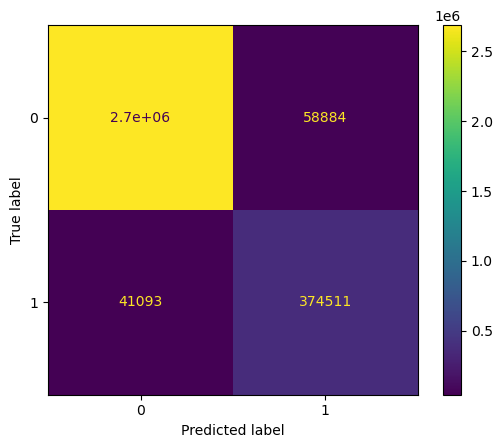

In [9]:
%%time
gbc = GradientBoostingClassifier(random_state=42)

res = fit_model('Gradient Boosting Classifier',gbc,x_train,y_train,x_test,y_test)
res_df = pd.concat([res_df,pd.DataFrame.from_dict(res,orient='index').T])
kfold_cross_validation('Gradient Boosting Classifier',gbc,x_train,y_train)
res